In [1]:
from dtuprosys.chemometrics.datasets import load_train_data
import matplotlib.pyplot as plt

from chemotools.derivative import SavitzkyGolay
from chemotools.scattering import MultiplicativeSignalCorrection, StandardNormalVariate

In [2]:
spectra, hplc = load_train_data()
spectra = spectra.loc[:, 950:1400]


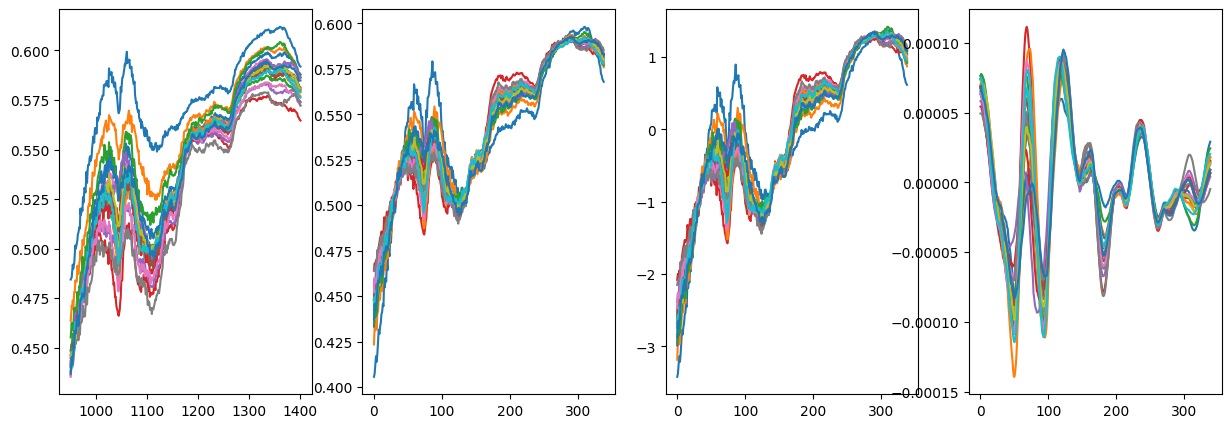

In [3]:
msc = MultiplicativeSignalCorrection(use_mean=True, use_median=False)
snv = StandardNormalVariate()
sg = SavitzkyGolay(window_size=51, polynomial_order=2, derivate_order=2, mode="nearest")

spectra_msc = msc.fit_transform(spectra)
spectra_snv = snv.fit_transform(spectra)
spectra_sg = sg.fit_transform(spectra)

fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[0].plot(spectra.T)
ax[1].plot(spectra_msc.T)
ax[2].plot(spectra_snv.T)
ax[3].plot(spectra_sg.T)
plt.show()
